<a href="https://colab.research.google.com/github/MangoHaha/MLFromScratch/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import math
import sys

In [0]:
def shuffle_data(X, y, seed=None):
  #concatenate x and y for random shuffle
  X_y = np.concatenate((X, y.reshape(len(y), 1)), axis=1)
  if seed:
    np.ramdom.seed(seed)
  np.random.shuffle(X_y)
  X = X_y[:, :-1] #every col except last
  y = X-y[:, -1]  #every last col
  return X, y

In [0]:
def train_test_split(X, y, test_size=0.5, seed=None):
  if seed:
    X, y = shuffle_data(X, y, seed)
  split = len(y) - int(len(y)//(1/test_size))
  train_X, test_X = X[:split], X[split:]
  train_y, test_y = y[:split], y[split:]
  return train_X, test_X, train_y, test_y

In [0]:
def mean_square_error(y, label):
  return np.mean(np.power(y-label, 2))

In [0]:
def standardize(X):
  mean = X.mean(axis=0)
  std = X.std(axis=0)
  X_std = X
  for col in range(np.shape(X)[1]):
    if(std[col]):
      X_std[:, col] = (X_std[:, col] - mean[col])/std[col]
  return X_std

In [0]:
def normalize(X, axis=-1, order=2):
  l2=np.atleast_1d(np.linalg.norm(X, order, axis))
  l2[l2==0] = 1
  return X/np.expand_dims(l2, axis)

In [0]:
class LinearRegression():
  def __init__(self, n_iter, learning_rate):
    self.n_iter = n_iter
    self.learning_rate = learning_rate
    
  def fit(self, X, y):
    num_features = np.shape(X)[1]
    self.w = np.random.random((num_features, ))
    self.b = np.random.random((1, ))
    print(np.shape(self.w))
    print(np.shape(self.b))


    for i in range(self.n_iter):
      w_gradient = X.T.dot(X.dot(self.w) - y + self.b)
      self.w -= self.learning_rate*w_gradient.mean()
      b_gradient = (X.dot(self.w) - y + self.b).mean()
      self.b -= self.learning_rate*b_gradient
  
  def predict(self, X):
    print(self.b)
    y_pred = X.dot(self.w) + self.b
    return y_pred
  

(200, 1)
(200,)
(1,)
(1,)
[99.76800209]
Mnean Square Error: 23.160258707365525


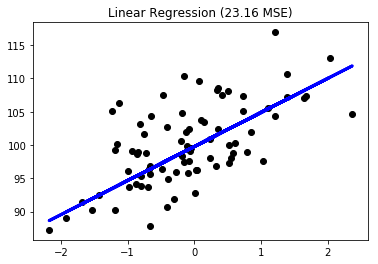

In [22]:
def main():
  X, y = datasets.make_regression(n_features=1, n_samples=200, bias=100, noise=5)
  print(np.shape(X))
  print(np.shape(y))
  #X = normalize(X)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
  clf = LinearRegression(1000, 0.01)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  
  mse = mean_square_error(y_test, y_pred)
  print("Mnean Square Error:", mse)
  
    # Plot the results
  plt.scatter(X_test[:, 0], y_test, color='black')
  plt.plot(X_test[:, 0], y_pred, color='blue', linewidth=3)
  plt.title("Linear Regression (%.2f MSE)" % mse)
  plt.show()

if __name__ == "__main__":
    main()